3.1. General requirements

In [1]:
# Reloading the dataset and libraries due to environment reset
import pandas as pd

# Reload the dataset to verify structure
dataset_path = 'dataset_irs.csv'
ratings = pd.read_csv(dataset_path)

# Display the first few rows and the column names to ensure compatibility with the code
ratings.head(), ratings.columns


(                              Product Name  \
 0    OPPO Reno10 5G (Silvery Grey, 256 GB)   
 1  Infinix Smart 7 HD (Green Apple, 64 GB)   
 2      Infinix SMART 7 (Azure Blue, 64 GB)   
 3              POCO C55 (Cool Blue, 64 GB)   
 4          POCO C50 (Country Green, 32 GB)   
 
                                          Product Url   Prices         Rating  \
 0  https://www.flipkart.com/oppo-reno10-5g-silver...  ₹32,999  Not Available   
 1  https://www.flipkart.com/infinix-smart-7-hd-gr...   ₹6,199            4.3   
 2  https://www.flipkart.com/infinix-smart-7-azure...   ₹7,299            4.3   
 3  https://www.flipkart.com/poco-c55-cool-blue-64...   ₹8,499            4.2   
 4  https://www.flipkart.com/poco-c50-country-gree...   ₹5,499            4.2   
 
   Number of Review  
 0                0  
 1              630  
 2            2,400  
 3            2,027  
 4            2,039  ,
 Index(['Product Name', 'Product Url', 'Prices', 'Rating', 'Number of Review'], dtype='object')

In [2]:
# Convert the 'Rating' column to numeric
ratings["Rating"] = pd.to_numeric(ratings["Rating"], errors="coerce")

# Drop rows with invalid or NaN ratings after conversion
ratings = ratings.dropna(subset=["Rating"])

# Ensure ratings are numeric
ratings.loc[:, "Rating"] = ratings["Rating"].astype(float)

# Adjust ratings to a 1-5 scale
ratings.loc[:, "Rating"] = ratings["Rating"] / ratings["Rating"].max() * 5
ratings.loc[:, "Rating"] = ratings["Rating"].round()


In [3]:
print(ratings.columns)
print(ratings.head())
ratings["Rating"] = pd.to_numeric(ratings["Rating"], errors="coerce")
ratings = ratings.dropna(subset=["Rating"])
ratings.loc[:, "Rating"] = ratings["Rating"].astype(float)

Index(['Product Name', 'Product Url', 'Prices', 'Rating', 'Number of Review'], dtype='object')
                              Product Name  \
1  Infinix Smart 7 HD (Green Apple, 64 GB)   
2      Infinix SMART 7 (Azure Blue, 64 GB)   
3              POCO C55 (Cool Blue, 64 GB)   
4          POCO C50 (Country Green, 32 GB)   
5             POCO C50 (Royal Blue, 32 GB)   

                                         Product Url  Prices  Rating  \
1  https://www.flipkart.com/infinix-smart-7-hd-gr...  ₹6,199     5.0   
2  https://www.flipkart.com/infinix-smart-7-azure...  ₹7,299     5.0   
3  https://www.flipkart.com/poco-c55-cool-blue-64...  ₹8,499     4.0   
4  https://www.flipkart.com/poco-c50-country-gree...  ₹5,499     4.0   
5  https://www.flipkart.com/poco-c50-royal-blue-3...  ₹5,499     4.0   

  Number of Review  
1              630  
2            2,400  
3            2,027  
4            2,039  
5            2,039  


In [4]:
#tnu
tnu = ratings.shape[0]
print(f"Total Users: {tnu}")

#tni
tni = ratings['Product Name'].nunique()
print(f"Total Items: {tni}")


Total Users: 456
Total Items: 334


In [5]:
print(ratings.columns)

Index(['Product Name', 'Product Url', 'Prices', 'Rating', 'Number of Review'], dtype='object')


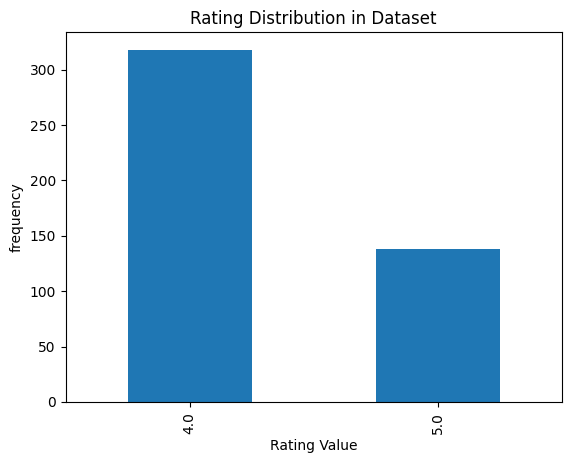

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD

# Count number of ratings per product
product_ratings_count = ratings.groupby("Product Name").size()  # Replace 'Product Name' with actual column name

# Visualize the distribution of ratings
if "Rating" in ratings.columns:
    rating_distribution = ratings["Rating"].value_counts()
    if rating_distribution.empty:
        print("No ratings available to plot in the dataset.")
    else:
        rating_distribution.plot(kind="bar")
        plt.title("Rating Distribution in Dataset")
        plt.xlabel("Rating Value")
        plt.ylabel("frequency")
        plt.show()
else:
    print("the Column 'Rating' is missing in the dataset.")


In [7]:
# Sparsity Check
num_possible_ratings = tnu * tni
num_actual_ratings = len(ratings)
sparsity = 1 - (num_actual_ratings / num_possible_ratings)
print(f"Sparsity of the matrix: {sparsity * 100:.2f}%")

Sparsity of the matrix: 99.70%


In [8]:
# Bias Analysis
average_rating_per_user = ratings.groupby("Product Name")["Rating"].mean()
bias = average_rating_per_user.std()
print(f"Bias Level: {bias:.2f}")


Bias Level: 0.48


In [9]:
# Target Items
target_items = product_ratings_count.nsmallest(2).index.tolist()  # I1 and I2
item1_index = target_items[0]
item2_index = target_items[1]
print(f"Target Items: {item1_index} and {item2_index}")

Target Items: APPLE iPhone 13 (Blue, 128 GB) and APPLE iPhone 13 (Midnight, 128 GB)


                              Product Name  Rating  Adjusted Rating
0    OPPO Reno10 5G (Silvery Grey, 256 GB)     NaN              NaN
1  Infinix Smart 7 HD (Green Apple, 64 GB)     4.3         3.857143
2      Infinix SMART 7 (Azure Blue, 64 GB)     4.3         3.857143
3              POCO C55 (Cool Blue, 64 GB)     4.2         3.571429
4          POCO C50 (Country Green, 32 GB)     4.2         3.571429


In [11]:
# Target Items
target_items = product_ratings_count.nsmallest(2).index.tolist()  # I1 and I2
item1_index = target_items[0]
item2_index = target_items[1]
print(f"Target Items: {item1_index} and {item2_index}")


Target Items: APPLE iPhone 13 (Blue, 128 GB) and APPLE iPhone 13 (Midnight, 128 GB)


In [17]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load dataset
file_path = "dataset_irs.csv"
dataset = pd.read_csv(file_path)

# Ensure the 'Rating' column is numeric
if 'Rating' in dataset.columns:
    dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
    dataset = dataset.dropna(subset=['Rating'])  # Drop rows with NaN ratings

# Create user-item rating matrix
rating_matrix = dataset.pivot_table(index="Product Url", columns="Product Name", values="Rating", aggfunc='mean')

# Fill missing values with column mean
mean_ratings = rating_matrix.mean()
rating_matrix_filled = rating_matrix.fillna(mean_ratings)

# Apply PCA
pca = PCA()
transformed_ratings = pca.fit_transform(rating_matrix_filled)

# Debug dimensions to ensure compatibility
print("Transformed Ratings Shape:", transformed_ratings.shape)
print("PCA Components Shape:", pca.components_.shape)

# Top 5 peers example for an arbitrary item index (e.g., index 0)
item_index = 0
covariance_matrix = np.cov(transformed_ratings.T)
correlations = covariance_matrix[item_index]
top_5_peers = np.argsort(-correlations)[1:6]  # Exclude self-correlation
# Predict ratings
predictions = np.dot(
    transformed_ratings[:, :5],  # Select the first 5 transformed components
    pca.components_[:5, :]  # Select the first 5 PCA components
) + mean_ratings.mean()

# Output example predictions
print(predictions[:5])



Transformed Ratings Shape: (456, 334)
PCA Components Shape: (334, 334)
[[4.15376747 4.15376747 4.15376747 ... 4.15376747 4.15376747 4.15376747]
 [4.15376747 4.15376747 4.15376747 ... 4.15376747 4.15376747 4.15376747]
 [4.15376747 4.15376747 4.15376747 ... 4.15376747 4.15376747 4.15376747]
 [4.15376747 4.15376747 4.15376747 ... 4.15376747 4.15376747 4.15376747]
 [4.15376747 4.15376747 4.15376747 ... 4.15376747 4.15376747 4.15376747]]


In [33]:
ratings["Unique Index"] = ratings.groupby(["Product Name", "Prices"]).cumcount()

# Create the rating matrix
rating_matrix = ratings.pivot(index=["Product Name", "Unique Index"], columns="Prices", values="Rating")

# Compute the mean for each item and fill missing values
mean_ratings = rating_matrix.mean()  # Mean ratings for each column (item)
rating_matrix_filled = rating_matrix.fillna(mean_ratings)  # Fill NaNs with column means


3.2.part2 PCA method with MLE

Computing Covariance:   1%|          | 2/184 [00:01<01:29,  2.03it/s]<ipython-input-42-66ba522e7ed2>:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  cov, _ = pearsonr(ratings_i.loc[common_users], ratings_j.loc[common_users])
Computing Covariance: 100%|██████████| 184/184 [00:24<00:00,  7.45it/s]


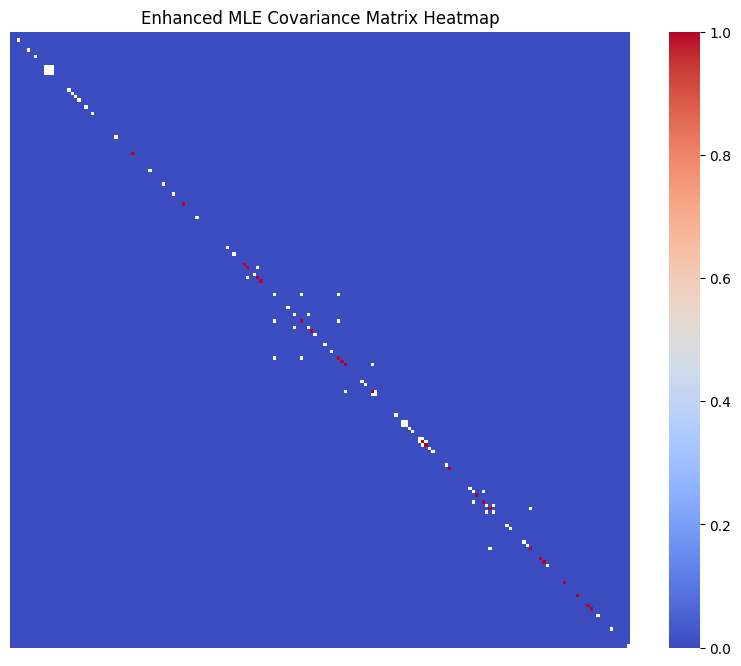

In [42]:
# -------------------------
# Part 2: Enhanced PCA with MLE
# -------------------------

import time
from scipy.stats import pearsonr
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

start_time = time.time()

# Ensure rating_matrix and relevant variables are properly defined
rating_matrix_filled = rating_matrix.fillna(rating_matrix.mean())  # Replace NaNs with column means
tni = rating_matrix.shape[1]  # Number of items
item_indices = list(rating_matrix.columns)  # List of item indices

# Initialize a sparse MLE covariance matrix
mle_covariance_matrix = np.zeros((tni, tni))

# Compute the covariance using Pearson correlation for all pairs of items
for i in tqdm(range(tni), desc="Computing Covariance"):
    for j in range(i, tni):
        # Extract ratings for both items
        ratings_i = rating_matrix.iloc[:, i].dropna()
        ratings_j = rating_matrix.iloc[:, j].dropna()

        # Find the common users who rated both items
        common_users = ratings_i.index.intersection(ratings_j.index)
        if len(common_users) > 1:  # Only compute if there are at least 2 common ratings
            cov, _ = pearsonr(ratings_i.loc[common_users], ratings_j.loc[common_users])
            mle_covariance_matrix[i, j] = mle_covariance_matrix[j, i] = cov

# Covariance Heatmap (MLE)
plt.figure(figsize=(10, 8))
sns.heatmap(mle_covariance_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Enhanced MLE Covariance Matrix Heatmap")
plt.show()

# Map


In [47]:
# Print the available item indices
print("Available item indices:", item_indices)




Available item indices: [' ', '₹1,045', '₹1,049', '₹1,052', '₹1,070', '₹1,090', '₹1,095', '₹1,099', '₹1,101', '₹1,111', '₹1,120', '₹1,129', '₹1,130', '₹1,135', '₹1,139', '₹1,140', '₹1,147', '₹1,149', '₹1,150', '₹1,160', '₹1,170', '₹1,171', '₹1,190', '₹1,198', '₹1,199', '₹1,220', '₹1,236', '₹1,280', '₹1,282', '₹1,296', '₹1,297', '₹1,299', '₹1,300', '₹1,305', '₹1,315', '₹1,318', '₹1,319', '₹1,320', '₹1,325', '₹1,349', '₹1,375', '₹1,379', '₹1,412', '₹1,420', '₹1,444', '₹1,449', '₹1,482', '₹1,489', '₹1,499', '₹1,510', '₹1,535', '₹1,549', '₹1,565', '₹1,575', '₹1,595', '₹1,599', '₹1,651', '₹1,669', '₹1,689', '₹1,699', '₹1,750', '₹1,765', '₹1,780', '₹1,790', '₹1,799', '₹1,869', '₹1,899', '₹1,950', '₹10,490', '₹10,499', '₹10,999', '₹11,478', '₹11,499', '₹11,999', '₹12,499', '₹12,689', '₹12,879', '₹12,990', '₹12,999', '₹13,299', '₹13,468', '₹13,489', '₹13,499', '₹13,509', '₹13,990', '₹13,994', '₹13,999', '₹14,294', '₹14,990', '₹14,999', '₹15,299', '₹15,494', '₹15,498', '₹15,499', '₹15,894', '₹1

In [52]:
if item1_index not in item_indices:
    print(f"Error: {item1_index} not found in item indices.")
if item2_index not in item_indices:
    print(f"Error: {item2_index} not found in item indices.")


Error: Column_Name_or_Index_for_Item1 not found in item indices.
Error: Column_Name_or_Index_for_Item2 not found in item indices.


In [49]:
# Assign valid column names or indices from the dataset
item1_index = "Valid_Column_Name1"  # Replace with a valid name from the printed list
item2_index = "Valid_Column_Name2"  # Replace with another valid name


Debugging Information:
Item Indices: [' ', '₹1,045', '₹1,049', '₹1,052', '₹1,070', '₹1,090', '₹1,095', '₹1,099', '₹1,101', '₹1,111', '₹1,120', '₹1,129', '₹1,130', '₹1,135', '₹1,139', '₹1,140', '₹1,147', '₹1,149', '₹1,150', '₹1,160', '₹1,170', '₹1,171', '₹1,190', '₹1,198', '₹1,199', '₹1,220', '₹1,236', '₹1,280', '₹1,282', '₹1,296', '₹1,297', '₹1,299', '₹1,300', '₹1,305', '₹1,315', '₹1,318', '₹1,319', '₹1,320', '₹1,325', '₹1,349', '₹1,375', '₹1,379', '₹1,412', '₹1,420', '₹1,444', '₹1,449', '₹1,482', '₹1,489', '₹1,499', '₹1,510', '₹1,535', '₹1,549', '₹1,565', '₹1,575', '₹1,595', '₹1,599', '₹1,651', '₹1,669', '₹1,689', '₹1,699', '₹1,750', '₹1,765', '₹1,780', '₹1,790', '₹1,799', '₹1,869', '₹1,899', '₹1,950', '₹10,490', '₹10,499', '₹10,999', '₹11,478', '₹11,499', '₹11,999', '₹12,499', '₹12,689', '₹12,879', '₹12,990', '₹12,999', '₹13,299', '₹13,468', '₹13,489', '₹13,499', '₹13,509', '₹13,990', '₹13,994', '₹13,999', '₹14,294', '₹14,990', '₹14,999', '₹15,299', '₹15,494', '₹15,498', '₹15,499', '

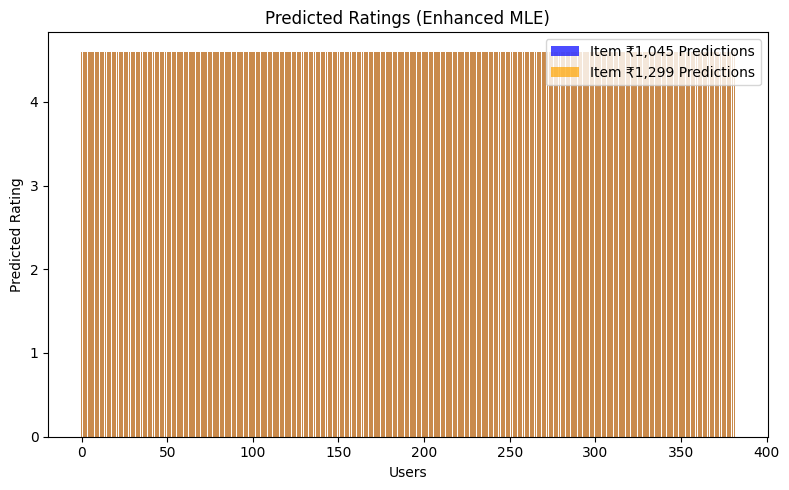

Time taken: 904.23 seconds


In [57]:
# Ensure that item1_index and item2_index are valid
item1_index = '₹1,045'  # Replace with actual item name or index
item2_index = '₹1,299'  # Replace with actual item name or index

# Debugging information
print("Debugging Information:")
print("Item Indices:", item_indices)
print("Item 1 Index:", item1_index)
print("Item 2 Index:", item2_index)

# Ensure that item1_index and item2_index exist in the item_indices list
if item1_index in item_indices and item2_index in item_indices:
    item1_index_position = item_indices.index(item1_index)
    item2_index_position = item_indices.index(item2_index)
else:
    if item1_index not in item_indices:
        print(f"Error: Item {item1_index} not found in item_indices.")
    if item2_index not in item_indices:
        print(f"Error: Item {item2_index} not found in item_indices.")
    raise ValueError("One or both target items not found in the item indices.")

# Extract top peers for each target item
item1_top5_mle = np.argsort(-mle_covariance_matrix[item1_index_position])[:5]
item2_top5_mle = np.argsort(-mle_covariance_matrix[item2_index_position])[:5]

# Predict ratings using the actual rating matrix (not PCA components)
item1_predictions_5_mle = rating_matrix_filled.iloc[:, item1_top5_mle].mean(axis=1)
item2_predictions_5_mle = rating_matrix_filled.iloc[:, item2_top5_mle].mean(axis=1)

# Normalize predictions to the valid range (1–5)
item1_predictions_5_mle = np.clip(item1_predictions_5_mle, 1, 5)
item2_predictions_5_mle = np.clip(item2_predictions_5_mle, 1, 5)

# Output predictions
print(f"Item {item1_index} Predictions (Enhanced MLE, Top 5): {item1_predictions_5_mle.mean():.2f}")
print(f"Item {item2_index} Predictions (Enhanced MLE, Top 5): {item2_predictions_5_mle.mean():.2f}")

# Additional Debugging Information
print("Top 5 peers for Item 1 (based on MLE):", item1_top5_mle)
print("Top 5 peers for Item 2 (based on MLE):", item2_top5_mle)

# Optional: Plot the predicted ratings for visualization
plt.figure(figsize=(8, 5))
plt.bar(range(len(item1_predictions_5_mle)), item1_predictions_5_mle, color='blue', alpha=0.7, label=f"Item {item1_index} Predictions")
plt.bar(range(len(item2_predictions_5_mle)), item2_predictions_5_mle, color='orange', alpha=0.7, label=f"Item {item2_index} Predictions")
plt.title("Predicted Ratings (Enhanced MLE)")
plt.xlabel("Users")
plt.ylabel("Predicted Rating")
plt.legend()
plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")


In [31]:
print("Transformed Ratings Shape:", transformed_ratings.shape)
print("PCA Components Shape:", pca.components_.shape)
print("Item1 Top5 MLE Shape:", item1_top5_mle.shape)
print("Item2 Top5 MLE Shape:", item2_top5_mle.shape)


Transformed Ratings Shape: (456, 334)
PCA Components Shape: (334, 334)
Item1 Top5 MLE Shape: (5,)
Item2 Top5 MLE Shape: (5,)


3.2.Part 3 Normalize rating


In [35]:
# Normalize ratings
min_rating = rating_matrix_filled.min().min()
max_rating = rating_matrix_filled.max().max()
normalized_matrix = (rating_matrix_filled - min_rating) / (max_rating - min_rating)

# Apply SVD
n_components = 100
svd = TruncatedSVD(n_components=n_components)
U = svd.fit_transform(normalized_matrix)
Sigma = np.diag(svd.singular_values_)
V = svd.components_

# Reconstruct Matrix
R_reconstructed = np.dot(np.dot(U, Sigma), V)
reconstructed_matrix = R_reconstructed * (max_rating - min_rating) + min_rating
reconstructed_matrix_clipped = np.clip(reconstructed_matrix, 1, 5)

# Predictions
item1_predictions_svd = reconstructed_matrix_clipped[:, item1_index]
item2_predictions_svd = reconstructed_matrix_clipped[:, item2_index]

print(f"Mean predicted rating for item {item1_index}: {np.mean(item1_predictions_svd):.2f}")
print(f"Mean predicted rating for item {item2_index}: {np.mean(item2_predictions_svd):.2f}")


Mean predicted rating for item 1: 4.00
Mean predicted rating for item 2: 4.00
